In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)



In [3]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Flatten

In [ ]:
(xtrain,ytrain),(xtest,ytest)=keras.datasets.mnist.load_data()

In [6]:
print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [9]:
xtrain=xtrain/255
xtest=xtest/255

In [30]:
model=Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [31]:
model.compile(loss='sparse_categorical_crossentropy',optimizer="adam",metrics='accuracy')

In [32]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 128)               100480    
                                                                 
 dense_4 (Dense)             (None, 128)               16512     
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [33]:
history=model.fit(xtrain,ytrain,epochs=10,batch_size=100,validation_data=(xtest,ytest))

Epoch 1/10
600/600 [==============================] - 3s 4ms/step - loss: 0.2927 - accuracy: 0.9171 - val_loss: 0.1353 - val_accuracy: 0.9601
Epoch 2/10
600/600 [==============================] - 2s 4ms/step - loss: 0.1163 - accuracy: 0.9652 - val_loss: 0.1202 - val_accuracy: 0.9613
Epoch 3/10
600/600 [==============================] - 2s 4ms/step - loss: 0.0795 - accuracy: 0.9760 - val_loss: 0.0876 - val_accuracy: 0.9733
Epoch 4/10
600/600 [==============================] - 2s 4ms/step - loss: 0.0594 - accuracy: 0.9818 - val_loss: 0.0750 - val_accuracy: 0.9762
Epoch 5/10
600/600 [==============================] - 3s 4ms/step - loss: 0.0470 - accuracy: 0.9852 - val_loss: 0.0755 - val_accuracy: 0.9774
Epoch 6/10
600/600 [==============================] - 3s 4ms/step - loss: 0.0360 - accuracy: 0.9887 - val_loss: 0.0792 - val_accuracy: 0.9757
Epoch 7/10
600/600 [==============================] - 2s 4ms/step - loss: 0.0296 - accuracy: 0.9906 - val_loss: 0.0735 - val_accuracy: 0.9782
Epoch 

In [26]:
ypred=model.predict(xtest)

313/313 [==============================] - 1s 2ms/step


In [27]:
ypred=ypred.argmax(axis=1)

In [28]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest,ypred)


0.983

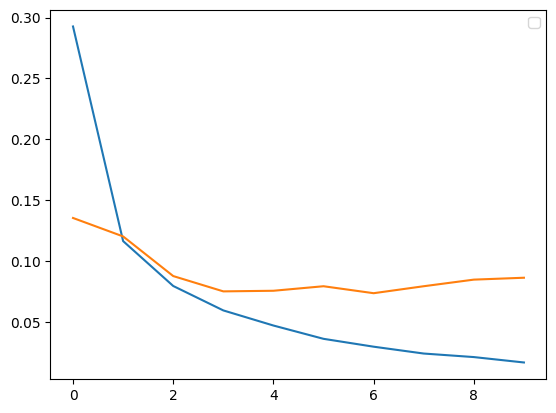

In [45]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend()

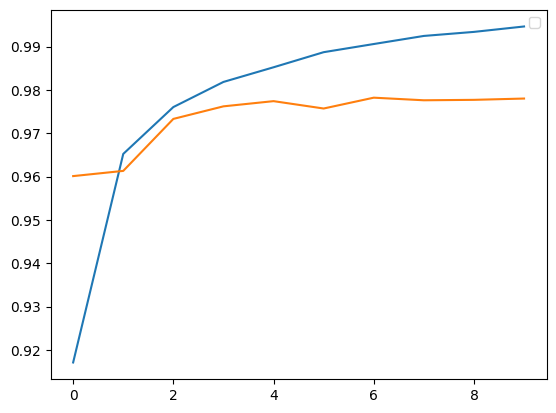

In [46]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend()

In [40]:
import matplotlib.pyplot as plt